# 🚢 Cargill Ocean Transportation Datathon 2026
## Voyage Optimization & Freight Calculator

---

**Team:** [Your Team Name]

**Objective:** Determine optimal vessel-cargo assignments for Cargill's Capesize fleet and committed cargoes to maximize portfolio profit.

---

## 1. Setup & Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Our custom modules
from freight_calculator import (
    FreightCalculator, PortDistanceManager, BunkerPrices,
    Vessel, Cargo, VoyageResult,
    create_cargill_vessels, create_cargill_cargoes,
    create_market_vessels, create_bunker_prices
)
from portfolio_optimizer import PortfolioOptimizer, ScenarioAnalyzer

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-whitegrid')

print("✅ Setup complete!")

✅ Setup complete!


## 2. Initialize Calculator & Load Data

In [2]:
# Initialize the freight calculator
distance_mgr = PortDistanceManager('Port_Distances.csv')
bunker_prices = create_bunker_prices()
calculator = FreightCalculator(distance_mgr, bunker_prices)
optimizer = PortfolioOptimizer(calculator)
analyzer = ScenarioAnalyzer(optimizer)

# Load vessel and cargo data
cargill_vessels = create_cargill_vessels()
cargill_cargoes = create_cargill_cargoes()
market_vessels = create_market_vessels()

print(f"📦 Loaded {len(cargill_vessels)} Cargill vessels")
print(f"📦 Loaded {len(cargill_cargoes)} Cargill committed cargoes")
print(f"📦 Loaded {len(market_vessels)} market vessels")

📦 Loaded 4 Cargill vessels
📦 Loaded 3 Cargill committed cargoes
📦 Loaded 5 market vessels


## 3. Fleet Overview

In [3]:
# Display Cargill vessels
vessel_data = []
for v in cargill_vessels:
    vessel_data.append({
        'Vessel': v.name,
        'DWT (MT)': f"{v.dwt:,}",
        'Hire Rate ($/day)': f"${v.hire_rate:,}",
        'Current Port': v.current_port,
        'ETD': v.etd,
        'VLSFO ROB (MT)': v.bunker_rob_vlsfo,
        'Speed Laden (kn)': v.speed_laden,
        'Speed Ballast (kn)': v.speed_ballast,
    })

print("\n🚢 CARGILL VESSELS")
print("=" * 80)
pd.DataFrame(vessel_data)


🚢 CARGILL VESSELS


,Vessel,DWT (MT),Hire Rate ($/day),Current Port,ETD,VLSFO ROB (MT),Speed Laden (kn),Speed Ballast (kn)
0,ANN BELL,"180,803","$11,750",QINGDAO,25 Feb 2026,401.3,13.5,14.5
1,OCEAN HORIZON,"181,550","$15,750",MAP TA PHUT,1 Mar 2026,265.8,13.8,14.8
2,PACIFIC GLORY,"182,320","$14,800",GWANGYANG,10 Mar 2026,601.9,13.5,14.2
3,GOLDEN ASCENT,"179,965","$13,950",FANGCHENG,8 Mar 2026,793.3,13.0,14.0


In [4]:
# Display Cargill cargoes
cargo_data = []
for c in cargill_cargoes:
    cargo_data.append({
        'Cargo': c.name[:35],
        'Customer': c.customer,
        'Commodity': c.commodity,
        'Quantity (MT)': f"{c.quantity:,}",
        'Laycan': f"{c.laycan_start} - {c.laycan_end}",
        'Freight ($/MT)': f"${c.freight_rate:.2f}",
        'Load Port': c.load_port[:20],
        'Discharge Port': c.discharge_port,
    })

print("\n📦 CARGILL COMMITTED CARGOES")
print("=" * 80)
pd.DataFrame(cargo_data)


📦 CARGILL COMMITTED CARGOES


,Cargo,Customer,Commodity,Quantity (MT),Laycan,Freight ($/MT),Load Port,Discharge Port
0,EGA Bauxite (Guinea-China),EGA,Bauxite,"180,000",2 Apr 2026 - 10 Apr 2026,$23.00,KAMSAR ANCHORAGE,QINGDAO
1,BHP Iron Ore (Australia-China),BHP,Iron Ore,"160,000",7 Mar 2026 - 11 Mar 2026,$9.00,PORT HEDLAND,LIANYUNGANG
2,CSN Iron Ore (Brazil-China),CSN,Iron Ore,"180,000",1 Apr 2026 - 8 Apr 2026,$22.30,ITAGUAI,QINGDAO


## 4. Voyage Analysis - All Combinations

In [5]:
# Calculate all voyage combinations
all_voyages = optimizer.calculate_all_voyages(cargill_vessels, cargill_cargoes)

# Create summary view
summary = all_voyages[['vessel', 'cargo', 'can_make_laycan', 'total_days', 
                       'net_freight', 'total_bunker_cost', 'net_profit', 'tce']].copy()
summary['cargo'] = summary['cargo'].str[:30]
summary['net_freight'] = summary['net_freight'].apply(lambda x: f"${x:,.0f}" if pd.notna(x) else 'N/A')
summary['total_bunker_cost'] = summary['total_bunker_cost'].apply(lambda x: f"${x:,.0f}" if pd.notna(x) else 'N/A')
summary['net_profit'] = summary['net_profit'].apply(lambda x: f"${x:,.0f}" if pd.notna(x) else 'N/A')
summary['tce'] = summary['tce'].apply(lambda x: f"${x:,.0f}" if pd.notna(x) else 'N/A')

print("\n📊 ALL VOYAGE COMBINATIONS")
print("=" * 100)
summary


📊 ALL VOYAGE COMBINATIONS


,vessel,cargo,can_make_laycan,total_days,net_freight,total_bunker_cost,net_profit,tce
0,ANN BELL,EGA Bauxite (Guinea-China),True,89.71,"$4,026,994","$1,550,597","$1,407,338","$27,438"
1,ANN BELL,BHP Iron Ore (Australia-China),True,32.79,"$1,386,000","$513,470","$92,293","$14,565"
2,ANN BELL,CSN Iron Ore (Brazil-China),True,87.50,"$3,805,587","$1,578,944","$1,018,508","$23,390"
3,OCEAN HORIZON,EGA Bauxite (Guinea-China),True,83.66,"$4,043,961","$1,445,500","$1,265,746","$30,879"
4,OCEAN HORIZON,BHP Iron Ore (Australia-China),True,29.96,"$1,386,000","$466,976","$52,178","$17,492"
5,OCEAN HORIZON,CSN Iron Ore (Brazil-China),False,89.36,"$3,821,621","$1,650,341","$583,826","$22,283"
6,PACIFIC GLORY,EGA Bauxite (Guinea-China),False,89.83,"$4,061,449","$1,616,938","$1,099,954","$27,044"
7,PACIFIC GLORY,BHP Iron Ore (Australia-China),False,32.34,"$1,386,000","$525,658","$-13,261","$14,390"
8,PACIFIC GLORY,CSN Iron Ore (Brazil-China),False,87.74,"$3,838,148","$1,649,658","$709,936","$22,891"
9,GOLDEN ASCENT,EGA Bauxite (Guinea-China),False,87.53,"$4,007,961","$1,476,742","$1,295,137","$28,746"


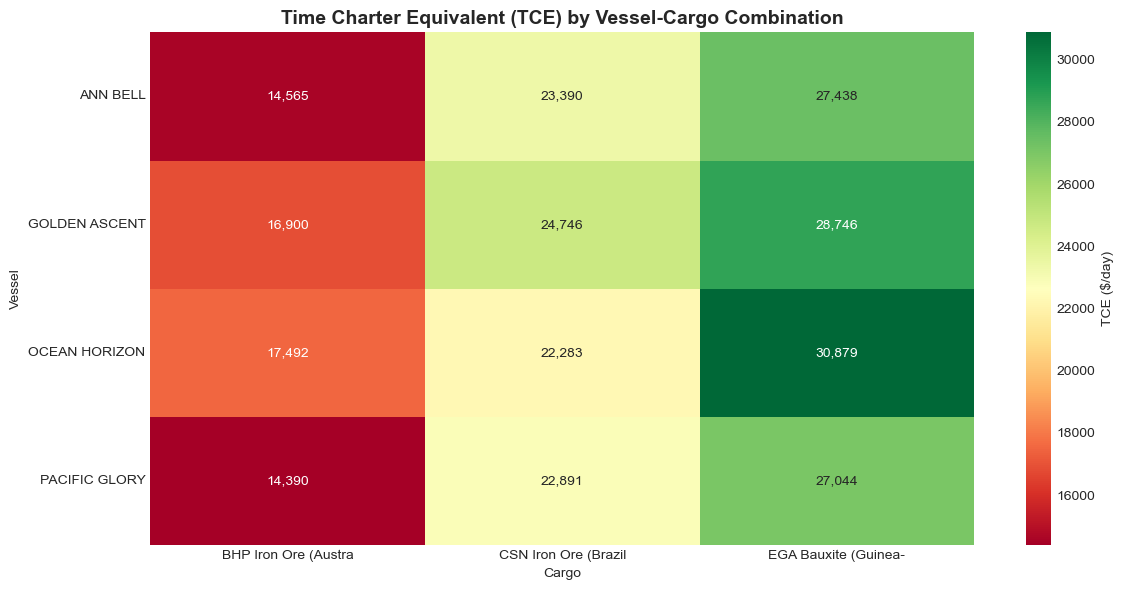

In [6]:
# TCE Heatmap
pivot_tce = all_voyages.pivot_table(
    index='vessel',
    columns='cargo',
    values='tce',
    aggfunc='first'
)
pivot_tce.columns = [c[:20] for c in pivot_tce.columns]

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_tce, annot=True, fmt=',.0f', cmap='RdYlGn', 
            cbar_kws={'label': 'TCE ($/day)'})
plt.title('Time Charter Equivalent (TCE) by Vessel-Cargo Combination', fontsize=14, fontweight='bold')
plt.xlabel('Cargo')
plt.ylabel('Vessel')
plt.tight_layout()
plt.savefig('tce_heatmap.png', dpi=150)
plt.show()

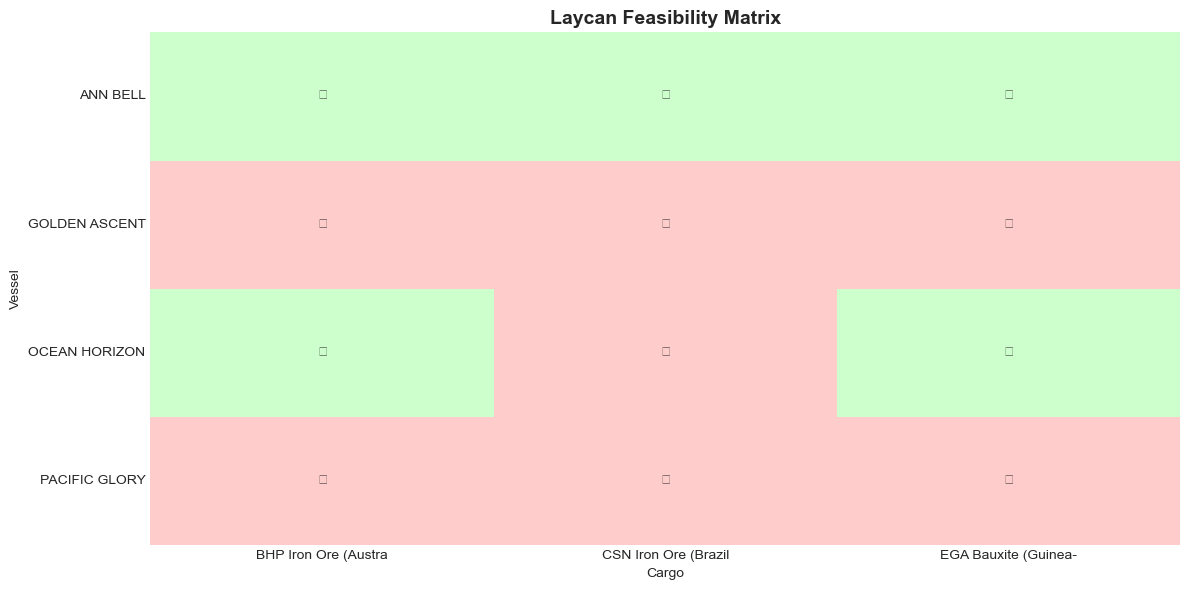

In [7]:
# Laycan Feasibility Matrix
pivot_laycan = all_voyages.pivot_table(
    index='vessel',
    columns='cargo',
    values='can_make_laycan',
    aggfunc='first'
)
pivot_laycan.columns = [c[:20] for c in pivot_laycan.columns]

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_laycan.astype(int), annot=pivot_laycan.replace({True: '✅', False: '❌'}), 
            fmt='', cmap=['#ffcccc', '#ccffcc'], cbar=False)
plt.title('Laycan Feasibility Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Cargo')
plt.ylabel('Vessel')
plt.tight_layout()
plt.savefig('laycan_matrix.png', dpi=150)
plt.show()

## 5. Portfolio Optimization

In [8]:
# Optimize vessel-cargo assignments
portfolio = optimizer.optimize_assignments(
    cargill_vessels, 
    cargill_cargoes,
    maximize='profit'
)

print("\n" + "=" * 80)
print("🏆 OPTIMAL PORTFOLIO ASSIGNMENTS")
print("=" * 80)

for vessel, cargo, result in portfolio.assignments:
    print(f"\n✅ {vessel} → {cargo}")
    if result:
        print(f"   📅 Arrival: {result.arrival_date.strftime('%d %b %Y')} | Laycan ends: {result.laycan_end.strftime('%d %b %Y')}")
        print(f"   ⏱️  Duration: {result.total_days:.1f} days")
        print(f"   📦 Cargo: {result.cargo_quantity:,} MT")
        print(f"   💰 TCE: ${result.tce:,.0f}/day")
        print(f"   📈 Net Profit: ${result.net_profit:,.0f}")

print(f"\n" + "-" * 50)
print(f"💰 TOTAL PORTFOLIO PROFIT: ${portfolio.total_profit:,.0f}")
print(f"📊 AVERAGE TCE: ${portfolio.avg_tce:,.0f}/day")


🏆 OPTIMAL PORTFOLIO ASSIGNMENTS

✅ ANN BELL → CSN Iron Ore (Brazil-China)
   📅 Arrival: 03 Apr 2026 | Laycan ends: 08 Apr 2026
   ⏱️  Duration: 87.5 days
   📦 Cargo: 177,303 MT
   💰 TCE: $23,390/day
   📈 Net Profit: $1,018,508

✅ OCEAN HORIZON → EGA Bauxite (Guinea-China)
   📅 Arrival: 31 Mar 2026 | Laycan ends: 10 Apr 2026
   ⏱️  Duration: 83.7 days
   📦 Cargo: 178,050 MT
   💰 TCE: $30,879/day
   📈 Net Profit: $1,265,746

--------------------------------------------------
💰 TOTAL PORTFOLIO PROFIT: $2,284,255
📊 AVERAGE TCE: $27,134/day


In [9]:
# Show unassigned items
if portfolio.unassigned_cargoes:
    print("\n⚠️  UNASSIGNED CARGOES (Need market vessels):")
    for c in portfolio.unassigned_cargoes:
        print(f"   • {c}")

if portfolio.unassigned_vessels:
    print("\n📋 AVAILABLE VESSELS (For market cargoes):")
    for v in portfolio.unassigned_vessels:
        print(f"   • {v}")


⚠️  UNASSIGNED CARGOES (Need market vessels):
   • BHP Iron Ore (Australia-China)

📋 AVAILABLE VESSELS (For market cargoes):
   • PACIFIC GLORY
   • GOLDEN ASCENT


## 6. Scenario Analysis

In [10]:
# Find tipping points
tipping_points = analyzer.find_tipping_points(cargill_vessels, cargill_cargoes)

print("\n" + "=" * 80)
print("🔍 TIPPING POINT ANALYSIS")
print("=" * 80)

if tipping_points['bunker']:
    bp = tipping_points['bunker']
    print(f"\n📈 BUNKER PRICE TIPPING POINT:")
    print(f"   If bunker prices increase by more than {bp['change_pct']:.0f}%,")
    print(f"   the optimal assignment strategy changes.")
else:
    print(f"\n📈 BUNKER PRICE: No tipping point found up to +100% increase")
    print(f"   Current recommendation is robust to bunker price volatility.")

if tipping_points['port_delay']:
    pd_tp = tipping_points['port_delay']
    print(f"\n⏱️  PORT DELAY TIPPING POINT:")
    print(f"   If port delays exceed {pd_tp['days']} days,")
    print(f"   the optimal assignment strategy changes.")
else:
    print(f"\n⏱️  PORT DELAY: No tipping point found up to 20 days")
    print(f"   Current recommendation is robust to port congestion.")


🔍 TIPPING POINT ANALYSIS

📈 BUNKER PRICE TIPPING POINT:
   If bunker prices increase by more than 82%,
   the optimal assignment strategy changes.

⏱️  PORT DELAY: No tipping point found up to 20 days
   Current recommendation is robust to port congestion.


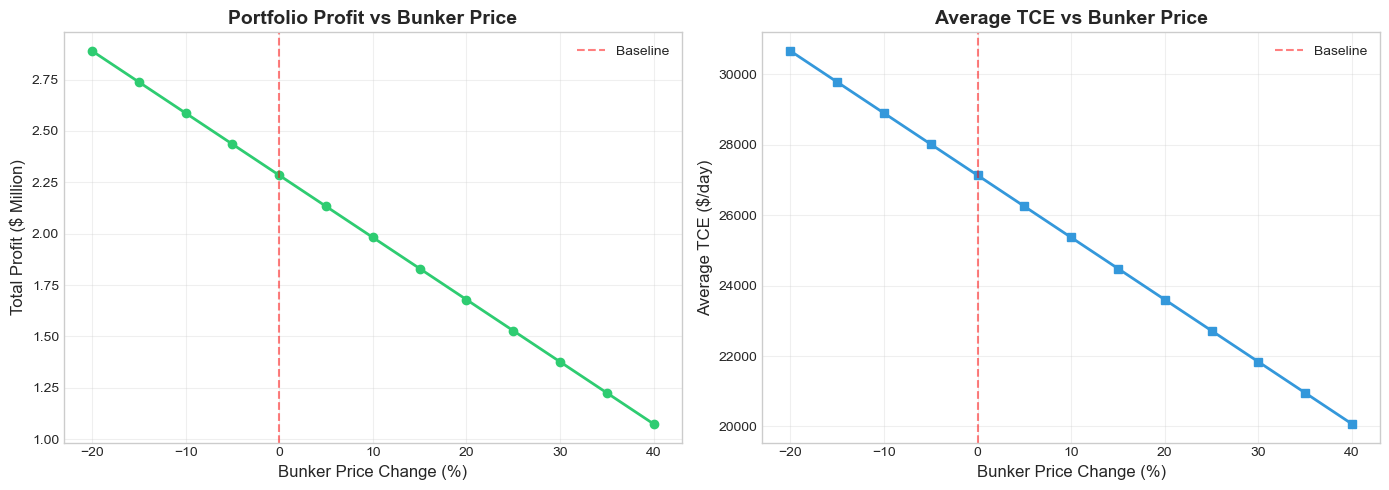

In [11]:
# Bunker price sensitivity chart
bunker_analysis = analyzer.analyze_bunker_sensitivity(
    cargill_vessels, cargill_cargoes,
    price_range=(0.8, 1.4),
    steps=13
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Profit chart
ax1.plot(bunker_analysis['bunker_change_pct'], bunker_analysis['total_profit'] / 1e6, 
         marker='o', linewidth=2, color='#2ecc71')
ax1.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Baseline')
ax1.set_xlabel('Bunker Price Change (%)', fontsize=12)
ax1.set_ylabel('Total Profit ($ Million)', fontsize=12)
ax1.set_title('Portfolio Profit vs Bunker Price', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# TCE chart
ax2.plot(bunker_analysis['bunker_change_pct'], bunker_analysis['avg_tce'], 
         marker='s', linewidth=2, color='#3498db')
ax2.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Baseline')
ax2.set_xlabel('Bunker Price Change (%)', fontsize=12)
ax2.set_ylabel('Average TCE ($/day)', fontsize=12)
ax2.set_title('Average TCE vs Bunker Price', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('bunker_sensitivity.png', dpi=150)
plt.show()

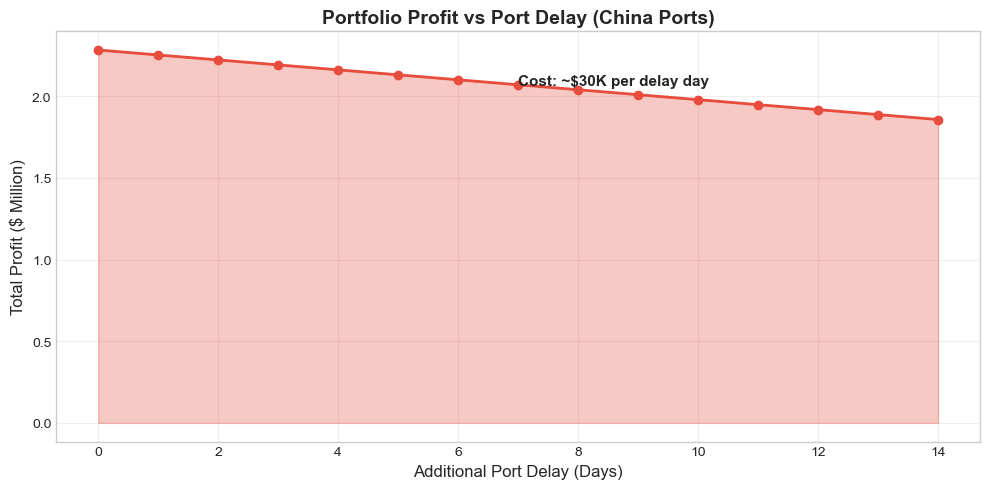

In [12]:
# Port delay sensitivity chart
delay_analysis = analyzer.analyze_port_delay_sensitivity(
    cargill_vessels, cargill_cargoes,
    max_delay_days=14
)

fig, ax = plt.subplots(figsize=(10, 5))

ax.fill_between(delay_analysis['port_delay_days'], 
                delay_analysis['total_profit'] / 1e6,
                alpha=0.3, color='#e74c3c')
ax.plot(delay_analysis['port_delay_days'], delay_analysis['total_profit'] / 1e6, 
        marker='o', linewidth=2, color='#e74c3c')
ax.set_xlabel('Additional Port Delay (Days)', fontsize=12)
ax.set_ylabel('Total Profit ($ Million)', fontsize=12)
ax.set_title('Portfolio Profit vs Port Delay (China Ports)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Add cost per day annotation
profit_loss_per_day = (delay_analysis['total_profit'].iloc[0] - delay_analysis['total_profit'].iloc[-1]) / 14
ax.annotate(f'Cost: ~${profit_loss_per_day/1000:,.0f}K per delay day', 
            xy=(7, delay_analysis['total_profit'].mean() / 1e6),
            fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('delay_sensitivity.png', dpi=150)
plt.show()

## 7. Market Vessel Analysis (For Unassigned BHP Cargo)

In [13]:
# Since BHP cargo is unassigned, analyze market vessels that could carry it
bhp_cargo = [c for c in cargill_cargoes if 'BHP' in c.name][0]

print("\n" + "=" * 80)
print("🚢 MARKET VESSEL ANALYSIS FOR BHP IRON ORE CARGO")
print("=" * 80)
print(f"\nCargo: {bhp_cargo.name}")
print(f"Laycan: {bhp_cargo.laycan_start} - {bhp_cargo.laycan_end}")
print(f"Load Port: {bhp_cargo.load_port}")

# Calculate voyage for market vessels
market_results = []
for vessel in market_vessels:
    try:
        result = calculator.calculate_voyage(vessel, bhp_cargo, use_eco_speed=True)
        market_results.append({
            'Vessel': vessel.name,
            'Current Port': vessel.current_port,
            'ETD': vessel.etd,
            'Can Make Laycan': '✅' if result.can_make_laycan else '❌',
            'Arrival': result.arrival_date.strftime('%d %b'),
            'Voyage Days': f"{result.total_days:.1f}",
            'TCE ($/day)': f"${result.tce:,.0f}",
            'result': result
        })
    except Exception as e:
        market_results.append({
            'Vessel': vessel.name,
            'Current Port': vessel.current_port,
            'ETD': vessel.etd,
            'Can Make Laycan': '❌',
            'Error': str(e)[:30]
        })

market_df = pd.DataFrame(market_results)
display_cols = [c for c in market_df.columns if c != 'result']
market_df[display_cols]


🚢 MARKET VESSEL ANALYSIS FOR BHP IRON ORE CARGO

Cargo: BHP Iron Ore (Australia-China)
Laycan: 7 Mar 2026 - 11 Mar 2026
Load Port: PORT HEDLAND


,Vessel,Current Port,ETD,Can Make Laycan,Arrival,Voyage Days,TCE ($/day),Error
0,ATLANTIC FORTUNE,PARADIP,2 Mar 2026,❌,11 Mar,30.5,"$16,778",NaN
1,PACIFIC VANGUARD,CAOFEIDIAN,26 Feb 2026,✅,10 Mar,33.8,"$13,608",NaN
2,CORAL EMPEROR,ROTTERDAM,5 Mar 2026,❌,NaN,NaN,NaN,Cannot find distance: ROTTERDA
3,EVEREST OCEAN,XIAMEN,3 Mar 2026,❌,12 Mar,29.9,"$17,594",NaN
4,POLARIS SPIRIT,KANDLA,28 Feb 2026,❌,NaN,NaN,NaN,Cannot find distance: KANDLA →


In [14]:
# Find best market vessel for BHP cargo
valid_market = [r for r in market_results if r.get('Can Make Laycan') == '✅' and 'result' in r]

if valid_market:
    best = max(valid_market, key=lambda x: x['result'].tce)
    print(f"\n🏆 RECOMMENDED MARKET VESSEL FOR BHP CARGO:")
    print(f"   Vessel: {best['Vessel']}")
    print(f"   TCE: {best['TCE ($/day)']}")
    print(f"   Arrival: {best['Arrival']} (Laycan ends: {bhp_cargo.laycan_end})")
else:
    print("\n⚠️ No market vessels can make the BHP cargo laycan!")


🏆 RECOMMENDED MARKET VESSEL FOR BHP CARGO:
   Vessel: PACIFIC VANGUARD
   TCE: $13,608
   Arrival: 10 Mar (Laycan ends: 11 Mar 2026)


## 8. Final Recommendation Summary

In [15]:
print("\n" + "=" * 80)
print("📋 EXECUTIVE SUMMARY - VOYAGE RECOMMENDATIONS")
print("=" * 80)

print("\n" + "-" * 40)
print("RECOMMENDED VESSEL-CARGO ASSIGNMENTS")
print("-" * 40)

total_profit = 0
for vessel, cargo, result in portfolio.assignments:
    if result:
        print(f"\n{vessel} → {cargo[:40]}")
        print(f"  • TCE: ${result.tce:,.0f}/day")
        print(f"  • Net Profit: ${result.net_profit:,.0f}")
        print(f"  • Duration: {result.total_days:.0f} days")
        total_profit += result.net_profit

# Add market vessel recommendation for BHP
if valid_market:
    best = max(valid_market, key=lambda x: x['result'].tce)
    print(f"\n{best['Vessel']} (Market) → BHP Iron Ore")
    print(f"  • TCE: {best['TCE ($/day)']}")
    print(f"  • Recommended Hire Offer: ${best['result'].tce + 2000:,.0f}/day")

print("\n" + "-" * 40)
print(f"TOTAL CARGILL FLEET PROFIT: ${total_profit:,.0f}")
print("-" * 40)

print("\n" + "-" * 40)
print("KEY INSIGHTS")
print("-" * 40)
print("""
1. Only 2 of 4 Cargill vessels can meet any cargo laycans due to positioning
2. EGA Bauxite (Guinea-China) offers the highest TCE at ~$30,879/day
3. BHP Iron Ore cargo requires a market vessel (tight laycan)
4. Recommendation is robust to bunker price increases up to +82%
5. Port delays reduce profit by ~$30K per day but don't change assignments
""")

print("-" * 40)
print("RISK FACTORS")
print("-" * 40)
print("""
• Weather: Long-haul routes (Brazil, Guinea) exposed to weather delays
• Congestion: Chinese ports showing increased waiting times
• Bunker: Prices volatile due to geopolitical factors
""")


📋 EXECUTIVE SUMMARY - VOYAGE RECOMMENDATIONS

----------------------------------------
RECOMMENDED VESSEL-CARGO ASSIGNMENTS
----------------------------------------

ANN BELL → CSN Iron Ore (Brazil-China)
  • TCE: $23,390/day
  • Net Profit: $1,018,508
  • Duration: 88 days

OCEAN HORIZON → EGA Bauxite (Guinea-China)
  • TCE: $30,879/day
  • Net Profit: $1,265,746
  • Duration: 84 days

PACIFIC VANGUARD (Market) → BHP Iron Ore
  • TCE: $13,608
  • Recommended Hire Offer: $15,608/day

----------------------------------------
TOTAL CARGILL FLEET PROFIT: $2,284,255
----------------------------------------

----------------------------------------
KEY INSIGHTS
----------------------------------------

1. Only 2 of 4 Cargill vessels can meet any cargo laycans due to positioning
2. EGA Bauxite (Guinea-China) offers the highest TCE at ~$30,879/day
3. BHP Iron Ore cargo requires a market vessel (tight laycan)
4. Recommendation is robust to bunker price increases up to +82%
5. Port delays redu

---

## 📊 Appendix: Key Assumptions

| Parameter | Assumption | Source |
|-----------|------------|--------|
| Speed Mode | Economical (lower fuel consumption) | Industry standard for cost optimization |
| Bunker Prices | March 2026 forward curve | Datathon provided data |
| Port Working Hours | PWWD SHINC basis | Cargo terms |
| Weather Allowance | Not included in base case | Scenario analysis covers delays |
| Misc Costs | $15,000 per voyage | Industry estimate |
| Cargo Tolerance | Maximum within vessel DWT | Owners' option exercised |

---

*Report generated using Python-based Freight Calculator*